In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
df_ori=pd.read_excel('dsoMovie.xlsx',sheet_name='sheet1')
df_ori
df=df_ori.copy()

# Cleaning Data

In [122]:
col_to_drop=[0,1,-1,-2,-3,-4]
df.drop(df.columns[col_to_drop], axis=1,inplace=True)  # drop by column index
df.drop(columns=['overview','adult','poster_path','status','tagline','video'],inplace=True)
#Reason to drop columns: No value and no use eg Overview. Adult all have same value.
df['budget'] = df['budget']/(10**5)
df.rename(columns={'budget':'budget(10*5)'},inplace=True)  # rename column 
df['revenue'] = df['revenue']/(10**5)
df.rename(columns={'revenue':'revenue(10*5)'},inplace=True)  # rename column 
# df.drop(['Unnamed: 0.1'], axis=1,inplace=True)         # drop by column name
df.set_index('id',inplace=True)
#keywords column: more interested in number of keywords
for ind in range(df.shape[0]):
    str_to_split=str(df['keywords'].iloc[ind])
    ls=str_to_split.split(", ")
    df['keywords'].iloc[ind]=len(ls)
df

,belongs_to_collection,budget(10*5),genres,homepage,imdb_id,original_language,original_title,popularity,production_companies,production_countries,...,title,vote_average,vote_count,cast,crew,keywords,cast_size,crew_size,director,ROI
id,,,,,,,,,,,,,,,,,,,,,
83,Open Water Collection,1.30,"Drama, Thriller",NaN,tt0374102,en,Open Water,10.652818,Plunge Pictures LLC,United States of America,...,Open Water,5.3,320,"Blanchard Ryan, Daniel Travis, Saul Stein, Mic...","[{'credit_id': '52fe4215c3a36847f8002991', 'de...",9,6,25.0,Chris Kentis,419.522723
3170,Bambi Collection,8.58,"Animation, Drama, Family",http://movies.disney.com/bambi,tt0034492,en,Bambi,13.698132,Walt Disney Productions,United States of America,...,Bambi,6.8,1450,"Donnie Dunagan, Peter Behn, Stan Alexander, Ca...","[{'credit_id': '52fe438cc3a36847f805ca73', 'de...",4,11,53.0,David Hand,310.709965
10331,Living Dead Collection,1.14,Horror,NaN,tt0063350,en,Night of the Living Dead,14.384198,"Laurel Group, Off Color Films, Image Ten, Mark...",United States of America,...,Night of the Living Dead,7.5,591,"Duane Jones, ""Judith ODea"", Karl Hardman, Mari...","[{'credit_id': '52fe435b9251416c7500d323', 'de...",11,13,7.0,George A. Romero,262.157895
9659,Mad Max Collection,4.00,"Adventure, Action, Thriller, Science Fiction",NaN,tt0079501,en,Mad Max,11.412619,"Kennedy Miller Productions, Mad Max Films, Cro...",Australia,...,Mad Max,6.6,1235,"Mel Gibson, Joanne Samuel, Hugh Keays-Byrne, S...","[{'credit_id': '52fe4517c3a36847f80bc041', 'de...",14,18,18.0,George Miller,249.000000
948,Halloween Collection,3.00,"Horror, Thriller",http://www.theofficialjohncarpenter.com/hallow...,tt0077651,en,Halloween,13.672759,"Compass International Pictures, Falcon Interna...",United States of America,...,Halloween,7.4,1066,"Donald Pleasence, Jamie Lee Curtis, P.J. Soles...","[{'credit_id': '52fe4291c3a36847f8029049', 'de...",27,25,17.0,John Carpenter,232.333333
838,American Graffiti Collection,7.77,"Comedy, Drama",NaN,tt0069704,en,American Graffiti,9.188584,"Lucasfilm, Universal Pictures, The Coppola Com...",United States of America,...,American Graffiti,6.9,330,"Richard Dreyfuss, Ron Howard, Paul Le Mat, Cha...","[{'credit_id': '52fe427ec3a36847f80232b1', 'de...",13,26,15.0,George Lucas,179.180180
1366,Rocky Collection,10.00,Drama,NaN,tt0075148,en,Rocky,14.774066,United Artists,United States of America,...,Rocky,7.5,1843,"Sylvester Stallone, Talia Shire, Burt Young, C...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",16,37,31.0,John G. Avildsen,116.235147
12262,The Hills Have Eyes (Original) Collection,2.30,Horror,NaN,tt0077681,en,The Hills Have Eyes,4.788002,Blood Relations Co.,United States of America,...,The Hills Have Eyes,6.1,145,"Martin Speer, Russ Grieve, John Steadman, Jame...","[{'credit_id': '52fe44d69251416c75042a37', 'de...",10,13,8.0,Wes Craven,107.695652
4488,Friday the 13th Collection,5.50,Horror,NaN,tt0080761,en,Friday the 13th,12.146747,"Paramount Pictures, Georgetown Productions Inc...",United States of America,...,Friday the 13th,6.4,622,"Betsy Palmer, Adrienne King, Harry Crosby, Lau...","[{'credit_id': '52fe43c6c3a36847f806e8f7', 'de...",15,23,22.0,Sean S. Cunningham,107.644729


# Data Analysis

In [123]:
#See all the numerical data information
df.describe()

,budget(10*5),popularity,revenue(10*5),runtime,vote_average,vote_count,keywords,crew_size,ROI
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1183.00000,1191.000000
mean,481.697249,14.001272,2008.920236,106.988245,6.202183,1389.654912,9.449202,35.67202,7.199575
std,570.214076,23.375952,2690.385939,20.194679,0.855184,1839.799948,6.182428,36.63335,23.065576
min,1.140000,0.293373,0.029700,0.000000,2.800000,2.000000,1.000000,1.00000,-0.999406
25%,90.000000,7.628446,334.611305,93.000000,5.700000,238.000000,5.000000,11.00000,1.151412
50%,250.000000,10.491734,971.386860,103.000000,6.200000,630.000000,8.000000,20.00000,2.706469
75%,660.000000,14.523663,2613.836015,118.000000,6.800000,1751.500000,13.000000,46.00000,5.640529
max,3800.000000,547.488298,27879.650870,320.000000,8.500000,12269.000000,37.000000,182.00000,419.522723


On average the movies are able to ge a positive ROI with the minimum in negative 0.99 and maximum in positive 419.52. 
The maximum budget is 3.8*10^8 while the maximum revenue is 2.78*10^9. Both budget,popularity and revenue contains outliers

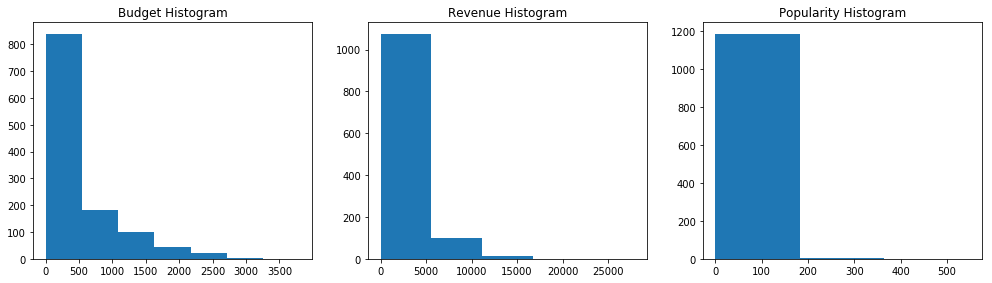

In [124]:
fig=plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.3)
ax1=fig.add_subplot(231)
# ax1=sns.distplot(df['budget(10*5)'])
plt.hist(df['budget(10*5)'],bins=7)
ax1.set_title('Budget Histogram')
ax2=fig.add_subplot(232)
# ax2=sns.distplot(df['revenue(10*5)'])
plt.hist(df['revenue(10*5)'],bins=5)
ax2.set_title('Revenue Histogram')
ax3=fig.add_subplot(233)
# ax3=sns.distplot(df['popularity'])
plt.hist(df['popularity'],bins=3)
ax3.set_title('Popularity Histogram')
plt.show()

Above the diagrams show the variance of budget, revenue and popularity. Popularity has the least variance, revenue with the most and budget in the middle. By observing the above graphs we see that most movies budget are around 0-1000 and most earnings are between 0-5000 means it is highly likely that most movies can earn.

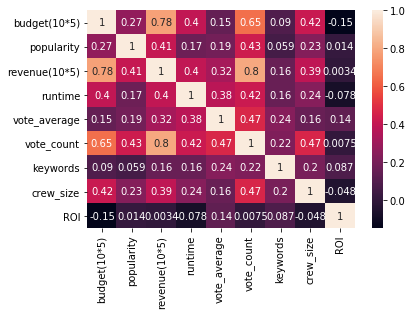

In [125]:
#see correlation
corr=df.corr()
sns.heatmap(corr,annot=True)

From above we can see that revenue and vote_count has the highest correlation of 0.8, with budget and revenue at 0.78. Hnece we plot to better understand.

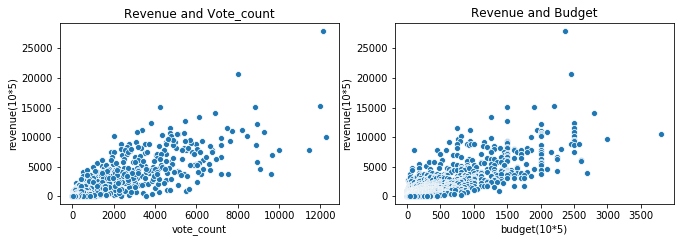

In [126]:
fig=plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=1)
ax1=fig.add_subplot(231)
ax1=sns.scatterplot(x='vote_count',y='revenue(10*5)',data=df)
ax1.set_title('Revenue and Vote_count')
ax2=fig.add_subplot(232)
ax2=sns.scatterplot(x='budget(10*5)',y='revenue(10*5)',data=df)
ax2.set_title('Revenue and Budget')
plt.show()

We can see a very general trend that as the the vote_count increase so does the revenue which means as more people watch and vote, more revenue is generated. As when the budget increases, more revenue is created as well.

# Crew Column Data Extraction

In [232]:
#Store the credits in each row
# print(df['crew'].iloc[0])
crs_store=[]
for ind in range(df_ori.shape[0]):
    crs = str(df_ori['crew'][ind]).split("}, ")
    crs[0]=crs[0].replace("[","")
    crs[-1]=crs[-1].replace("]","")
    crs_store.append(crs)
# crs_store

In [131]:
#dictionary to keep track of the credits in each row
dict_crew={}
dict_crew=dict_crew.fromkeys(range(df.shape[0]))
# dict_crew

In [132]:
#2D dictionary every row have the infos of the crew column
for ind in range(df.shape[0]):
    string_check=crs_store[ind]
    dict_row_store={}
    for indx in range(len(string_check)):
#         print(ind," ",indx)
        m_list=string_check[indx]  
        m_list=m_list.split(", '")
        for item in m_list:
#             if not item == '':
                item=item.replace("{","").replace("'","")
                ls=item.split(": ")
#                 if ind==375 and indx==188:
#                     print("list ----------",ls)
#                     print(ls[0] not in dict_row_store.keys())
                if len(ls)==2:
                    if ls[0] not in dict_row_store.keys():
                        dict_row_store[ls[0]] = [ls[1]]
                    else:
                        dict_row_store[ls[0]].append(ls[1])
    dict_crew[ind]=dict_row_store
# dict_crew

In [143]:
# transfer to column
df['credit_id']=None
df['department']=None
df['gender']=None
df['id']=None
df['job']=None
df['name']=None
df['profile_path']=None
for ind in range(df.shape[0]):
       for k in dict_crew[ind].keys():  
            df[k].iloc[ind]=dict_crew[ind][k]

In [94]:
df2=df.copy()

NameError: name 'df' is not defined

In [168]:
#profile path useless
df2.drop(columns=['profile_path'],inplace=True)
df2

,belongs_to_collection,budget(10*5),genres,homepage,imdb_id,original_language,original_title,popularity,production_companies,production_countries,...,cast_size,crew_size,director,ROI,credit_id,department,gender,id,job,name
id,,,,,,,,,,,,,,,,,,,,,
83,Open Water Collection,1.30,"Drama, Thriller",NaN,tt0374102,en,Open Water,10.652818,Plunge Pictures LLC,United States of America,...,6,25.0,Chris Kentis,419.522723,"[52fe4215c3a36847f8002991, 52fe4215c3a36847f80...","[Directing, Camera, Editing, Writing, Camera, ...","[2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, ...","[640, 640, 640, 640, 642, 642, 5912, 13177, 13...","[Director, Director of Photography, Editor, Au...","[Chris Kentis, Chris Kentis, Chris Kentis, Chr..."
3170,Bambi Collection,8.58,"Animation, Drama, Family",http://movies.disney.com/bambi,tt0034492,en,Bambi,13.698132,Walt Disney Productions,United States of America,...,11,53.0,David Hand,310.709965,"[52fe438cc3a36847f805ca73, 5914dd79c3a36842690...","[Production, Sound, Sound, Directing, Sound, D...","[2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, ...","[2106, 2107, 3642, 5446, 5466, 5690, 5691, 114...","[Producer, Orchestrator, Orchestrator, Directo...","[Walt Disney, Paul J. Smith, Charles Wolcott, ..."
10331,Living Dead Collection,1.14,Horror,NaN,tt0063350,en,Night of the Living Dead,14.384198,"Laurel Group, Off Color Films, Image Ten, Mark...",United States of America,...,13,7.0,George A. Romero,262.157895,"[52fe435b9251416c7500d323, 52fe435b9251416c750...","[Writing, Writing, Production, Camera, Editing...","[2, 2, 2, 2, 2, 2, 2]","[14999, 64831, 64833, 14999, 14999, 14999, 97914]","[Screenplay, Screenplay, Producer, Director of...","[George A. Romero, John A. Russo, Russell Stre..."
9659,Mad Max Collection,4.00,"Adventure, Action, Thriller, Science Fiction",NaN,tt0079501,en,Mad Max,11.412619,"Kennedy Miller Productions, Mad Max Films, Cro...",Australia,...,18,18.0,George Miller,249.000000,"[52fe4517c3a36847f80bc041, 52fe4517c3a36847f80...","[Writing, Directing, Writing, Camera, Producti...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, ...","[20629, 20629, 20629, 28240, 58140, 58407, 584...","[Screenplay, Director, Story, Director of Phot...","[George Miller, George Miller, George Miller, ..."
948,Halloween Collection,3.00,"Horror, Thriller",http://www.theofficialjohncarpenter.com/hallow...,tt0077651,en,Halloween,13.672759,"Compass International Pictures, Falcon Interna...",United States of America,...,25,17.0,John Carpenter,232.333333,"[52fe4291c3a36847f8029049, 52fe4291c3a36847f80...","[Camera, Writing, Production, Writing, Directi...","[2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, ...","[1060, 2161, 2161, 11770, 11770, 11770, 11776,...","[Director of Photography, Screenplay, Producer...","[Dean Cundey, Debra Hill, Debra Hill, John Car..."
838,American Graffiti Collection,7.77,"Comedy, Drama",NaN,tt0069704,en,American Graffiti,9.188584,"Lucasfilm, Universal Pictures, The Coppola Com...",United States of America,...,26,15.0,George Lucas,179.180180,"[52fe427ec3a36847f80232b1, 52fe427ec3a36847f80...","[Directing, Writing, Writing, Writing, Product...","[2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1]","[1, 1, 687, 686, 1776, 12401, 12402, 12403, 85...","[Director, Screenplay, Screenplay, Screenplay,...","[George Lucas, George Lucas, Gloria Katz, Will..."
1366,Rocky Collection,10.00,Drama,NaN,tt0075148,en,Rocky,14.774066,United Artists,United States of America,...,37,31.0,John G. Avildsen,116.235147,"[579948e9c3a36874e9007b0b, 579949b3925141230e0...","[Editing, Directing, Production, Art, Sound, D...","[2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, ...","[1918, 4699, 18379, 10064, 10494, 10546, 11472...","[Editor, Assistant Director, Executive In Char...","[Richard Halsey, Steve Perry, Hal W. Polaire, ..."
12262,The Hills Have Eyes (Original) Collection,2.30,Horror,NaN,tt0077681,en,The Hills Have Eyes,4.788002,Blood Relations Co.,United States of America,...,13,8.0,Wes Craven,107.695652,"[52fe44d69251416c75042a37, 52

In [170]:
#more data cleaning on the release_date column
df2['release_month']=None
df2['release_year']=None
for ind in range(df.shape[0]):
    to_split=str(df2['release_date'].iloc[ind]).replace(' 00:00:00','')
    ls=to_split.split('-')
    df2['release_year'].iloc[ind]=ls[0]
    df2['release_month'].iloc[ind]=ls[1]

In [3]:
df2.to_excel(r'D:\HW\df.xlsx')

NameError: name 'df2' is not defined

In [541]:
#Read in from df. Save time
df2=pd.read_excel('df.xlsx')

In [542]:
df3=df2.copy()

# Find the the top 100 movies after 2000 by revenue 

In [543]:
df3['release_year']=df3['release_year'].astype(int)
df3['release_month']=df3['release_month'].astype(int)
after_2000s=df3[df3['release_year']>=2000]
after_2000s

,id,belongs_to_collection,budget(10*5),genres,homepage,imdb_id,original_language,original_title,popularity,production_companies,...,director,ROI,credit_id,department,gender,id.1,job,name,release_month,release_year
0,83,Open Water Collection,1.30,"Drama, Thriller",NaN,tt0374102,en,Open Water,10.652818,Plunge Pictures LLC,...,Chris Kentis,419.522723,"['52fe4215c3a36847f8002991', '52fe4215c3a36847...","['Directing', 'Camera', 'Editing', 'Writing', ...","['2', '2', '2', '2', '1', '1', '2', '2', '0', ...","['640', '640', '640', '640', '642', '642', '59...","['Director', 'Director of Photography', 'Edito...","['Chris Kentis', 'Chris Kentis', 'Chris Kentis...",8,2004
12,176,Saw Collection,12.00,"Horror, Mystery, Crime",NaN,tt0387564,en,Saw,23.508433,"Lions Gate Films, Twisted Pictures, Evolution ...",...,James Wan,85.593058,"['52fe4223c3a36847f8006c57', '56f5fec79251417c...","['Directing', 'Writing', 'Writing', 'Writing',...","['2', '2', '2', '2', '2', '2', '2', '2', '2', ...","['2127', '2127', '2128', '2128', '2145', '2146...","['Director', 'Story', 'Writer', 'Story', 'Prod...","['James Wan', 'James Wan', 'Leigh Whannell', '...",10,2004
15,8346,My Big Fat Greek Wedding Collection,50.00,"Comedy, Drama, Romance",NaN,tt0259446,en,My Big Fat Greek Wedding,6.719949,"Home Box Office (HBO), Playtone, Gold Circle F...",...,Joel Zwick,72.748809,"['52fe44a1c3a36847f80a102d', '52fe44a1c3a36847...","['Directing', 'Writing', 'Production', 'Produc...","['2', '1', '2', '2', '1', '2', '0', '0', '2']","['54644', '54645', '27098', '31', '12931', '72...","['Director', 'Screenplay', 'Producer', 'Produc...","['Joel Zwick', 'Nia Vardalos', 'Gary Goetzman'...",2,2002
21,49018,Insidious Collection,15.00,"Horror, Thriller",http://www.insidious-movie.com/,tt1591095,en,Insidious,17.248140,"Alliance Films, IM Global, Stage 6 Films, Haun...",...,James Wan,63.672767,"['52fe4780c3a36847f8139515', '540229a80e0a2658...","['Directing', 'Editing', 'Writing', 'Productio...","['2', '2', '2', '1', '2', '2', '0', '2', '2', ...","['2127', '2127', '2128', '9545', '26714', '516...","['Director', 'Editor', 'Writer', 'Casting', 'D...","['James Wan', 'James Wan', 'Leigh Whannell', '...",9,2010
24,41436,Paranormal Activity Collection,30.00,"Horror, Thriller",http://www.paranormalmovie.com/trailer/,tt1536044,en,Paranormal Activity 2,7.388933,"Paramount Pictures, Blumhouse Productions, Sol...",...,Tod Williams,58.170677,"['535d00bdc3a368227300048e', '5476fc3a92514168...","['Production', 'Production', 'Directing', 'Cam...","['1', '2', '2', '2', '2', '2', '0', '2', '2', ...","['494', '5575', '20133', '45738', '54248', '60...","['Casting', 'Executive Producer', 'Director', ...","['Terri Taylor', 'Akiva Goldsman', 'Tod Willia...",10,2010
30,72571,Paranormal Activity Collection,50.00,Horror,http://www.paranormalmovie.com/,tt1778304,en,Paranormal Activity 3,10.996308,"Paramount Pictures, Blumhouse Productions, Roo...",...,Henry Joost,40.140764,"['535d01fbc3a36830b0003e43', '52fe4874c3a36848...","['Production', 'Writing', 'Production', 'Produ...","['1', '2', '2', '2', '2', '1', '0', '2', '2', ...","['494', '54248', '54248', '84348', '90591', '1...","['Casting', 'Writer', 'Co-Producer', 'Producer...","['Terri Taylor', 'Christopher B. Landon', 'Chr...",10,2011
36,250546,Annabelle Collection,65.00,Horror,http://annabellemovie.com/,tt3322940,en,Annabelle,23.242452,"New Line Cinema, The Safran Company, Evergreen...",...,John R. Leonetti,38.272894,"['540227940e0a2658e900554d', '52fe4df69251416c...","['Production', 'Directing', 'Art', 'Art', 'Edi...","['2', '2', '2', '1', '2', '2', '2', '2', '0', ...","['2127', '26714', '15427', '17851', '51795', '...","['Producer', 'Director', 'Production Design', ...","['James Wan', 'John R. Leonetti', 'Bob Ziembic...",10,2014
37,215,Saw Collection,40.00,Horror,NaN,tt0432348,en,Saw II,15.399863,"Lions Gate Films, Got Films, Twisted Pictures,...",...,Darren Lynn Bousman,37.231273,"['560ebff6c3a368682400bff4', '52fe4227c3a36847...","['Production', 'Writing', '

In [544]:
after_2000s.sort_values(by='revenue(10*5)', ascending=False)
top_100=after_2000s.head(100)
top_100

,id,belongs_to_collection,budget(10*5),genres,homepage,imdb_id,original_language,original_title,popularity,production_companies,...,director,ROI,credit_id,department,gender,id.1,job,name,release_month,release_year
0,83,Open Water Collection,1.30,"Drama, Thriller",NaN,tt0374102,en,Open Water,10.652818,Plunge Pictures LLC,...,Chris Kentis,419.522723,"['52fe4215c3a36847f8002991', '52fe4215c3a36847...","['Directing', 'Camera', 'Editing', 'Writing', ...","['2', '2', '2', '2', '1', '1', '2', '2', '0', ...","['640', '640', '640', '640', '642', '642', '59...","['Director', 'Director of Photography', 'Edito...","['Chris Kentis', 'Chris Kentis', 'Chris Kentis...",8,2004
12,176,Saw Collection,12.00,"Horror, Mystery, Crime",NaN,tt0387564,en,Saw,23.508433,"Lions Gate Films, Twisted Pictures, Evolution ...",...,James Wan,85.593058,"['52fe4223c3a36847f8006c57', '56f5fec79251417c...","['Directing', 'Writing', 'Writing', 'Writing',...","['2', '2', '2', '2', '2', '2', '2', '2', '2', ...","['2127', '2127', '2128', '2128', '2145', '2146...","['Director', 'Story', 'Writer', 'Story', 'Prod...","['James Wan', 'James Wan', 'Leigh Whannell', '...",10,2004
15,8346,My Big Fat Greek Wedding Collection,50.00,"Comedy, Drama, Romance",NaN,tt0259446,en,My Big Fat Greek Wedding,6.719949,"Home Box Office (HBO), Playtone, Gold Circle F...",...,Joel Zwick,72.748809,"['52fe44a1c3a36847f80a102d', '52fe44a1c3a36847...","['Directing', 'Writing', 'Production', 'Produc...","['2', '1', '2', '2', '1', '2', '0', '0', '2']","['54644', '54645', '27098', '31', '12931', '72...","['Director', 'Screenplay', 'Producer', 'Produc...","['Joel Zwick', 'Nia Vardalos', 'Gary Goetzman'...",2,2002
21,49018,Insidious Collection,15.00,"Horror, Thriller",http://www.insidious-movie.com/,tt1591095,en,Insidious,17.248140,"Alliance Films, IM Global, Stage 6 Films, Haun...",...,James Wan,63.672767,"['52fe4780c3a36847f8139515', '540229a80e0a2658...","['Directing', 'Editing', 'Writing', 'Productio...","['2', '2', '2', '1', '2', '2', '0', '2', '2', ...","['2127', '2127', '2128', '9545', '26714', '516...","['Director', 'Editor', 'Writer', 'Casting', 'D...","['James Wan', 'James Wan', 'Leigh Whannell', '...",9,2010
24,41436,Paranormal Activity Collection,30.00,"Horror, Thriller",http://www.paranormalmovie.com/trailer/,tt1536044,en,Paranormal Activity 2,7.388933,"Paramount Pictures, Blumhouse Productions, Sol...",...,Tod Williams,58.170677,"['535d00bdc3a368227300048e', '5476fc3a92514168...","['Production', 'Production', 'Directing', 'Cam...","['1', '2', '2', '2', '2', '2', '0', '2', '2', ...","['494', '5575', '20133', '45738', '54248', '60...","['Casting', 'Executive Producer', 'Director', ...","['Terri Taylor', 'Akiva Goldsman', 'Tod Willia...",10,2010
30,72571,Paranormal Activity Collection,50.00,Horror,http://www.paranormalmovie.com/,tt1778304,en,Paranormal Activity 3,10.996308,"Paramount Pictures, Blumhouse Productions, Roo...",...,Henry Joost,40.140764,"['535d01fbc3a36830b0003e43', '52fe4874c3a36848...","['Production', 'Writing', 'Production', 'Produ...","['1', '2', '2', '2', '2', '1', '0', '2', '2', ...","['494', '54248', '54248', '84348', '90591', '1...","['Casting', 'Writer', 'Co-Producer', 'Producer...","['Terri Taylor', 'Christopher B. Landon', 'Chr...",10,2011
36,250546,Annabelle Collection,65.00,Horror,http://annabellemovie.com/,tt3322940,en,Annabelle,23.242452,"New Line Cinema, The Safran Company, Evergreen...",...,John R. Leonetti,38.272894,"['540227940e0a2658e900554d', '52fe4df69251416c...","['Production', 'Directing', 'Art', 'Art', 'Edi...","['2', '2', '2', '1', '2', '2', '2', '2', '0', ...","['2127', '26714', '15427', '17851', '51795', '...","['Producer', 'Director', 'Production Design', ...","['James Wan', 'John R. Leonetti', 'Bob Ziembic...",10,2014
37,215,Saw Collection,40.00,Horror,NaN,tt0432348,en,Saw II,15.399863,"Lions Gate Films, Got Films, Twisted Pictures,...",...,Darren Lynn Bousman,37.231273,"['560ebff6c3a368682400bff4', '52fe4227c3a36847...","['Production', 'Writing', '

# Find the number of appearance of actors in the top 100 movies

In [545]:
dict_actors={}
# print(top_100['cast'].iloc[0])
for ind in range(top_100.shape[0]):
    to_split=str(top_100['cast'].iloc[ind])
    ls=to_split.split(", ")
    for name in ls:
        if name not in dict_actors.keys():
            dict_actors[name]=1
        else:
            dict_actors[name]+=1
#       if ls[0] not in dict_row_store.keys():
#                         dict_row_store[ls[0]] = [ls[1]]
#                     else:
#                         dict_row_store[ls[0]].append(ls[1])
dict_actors

{'Blanchard Ryan': 1,
 'Daniel Travis': 1,
 'Saul Stein': 1,
 'Michael E. Williamson': 1,
 'Christina Zenato': 1,
 'John Charles': 1,
 'Cary Elwes': 1,
 'Danny Glover': 1,
 'Monica Potter': 1,
 'Michael Emerson': 1,
 'Ken Leung': 1,
 'Tobin Bell': 5,
 'Leigh Whannell': 4,
 'Dina Meyer': 3,
 'Mike Butters': 1,
 'Paul Gutrecht': 1,
 'Nia Vardalos': 1,
 'John Corbett': 1,
 'Lainie Kazan': 1,
 'Michael Constantine': 1,
 'Andrea Martin': 1,
 'Joey Fatone': 1,
 'Louis Mandylor': 1,
 'Gia Carides': 1,
 'Christina Eleusiniotis': 1,
 'Marita Zouravlioff': 1,
 'Patrick Wilson': 3,
 'Rose Byrne': 2,
 'Ty Simpkins': 2,
 'Barbara Hershey': 1,
 'Lin Shaye': 2,
 'Angus Sampson': 2,
 'Andrew Astor': 1,
 'Corbett Tuck': 2,
 'Heather Tocquigny': 1,
 'Katie Featherston': 4,
 'David Bierend': 1,
 'Brian Boland': 1,
 'Molly Ephraim': 2,
 'Seth Ginsberg': 1,
 'Sprague Grayden': 2,
 'William Juan Prieto': 1,
 'Jackson Xenia Prieto': 1,
 'Micah Sloat': 1,
 'Vivis Cortez': 1,
 'Lauren Bittner': 1,
 'Christophe

In [546]:
list_actors=sorted(dict_actors.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
actors=pd.DataFrame(list_actors)
actors.rename(columns={0:'Actor Name',1:'Number of appearance'},inplace=True)
actors.set_index('Actor Name',inplace=True)
actors

,Number of appearance
Actor Name,
Tobin Bell,5
Maggie Smith,5
Steve Carell,4
Shawnee Smith,4
Seann William Scott,4
Leigh Whannell,4
Kristen Wiig,4
Katie Featherston,4
Elizabeth Reaser,4


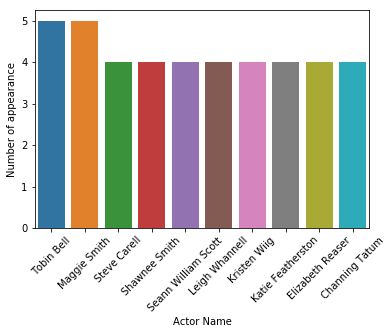

In [547]:
to_plot=actors.head(10)
to_plot
ax1=sns.barplot(x=to_plot.index,y='Number of appearance',data=to_plot)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.show()

# Find the actors in top movie collection, and corresponding genre by popularity and revenue

In [548]:
collection_group=df2.groupby('belongs_to_collection').agg({'original_title' : 'count', 'popularity' : 'max','revenue(10*5)':'max'})
# collection_group

In [549]:
df3.drop_duplicates(subset="original_title",keep='first',inplace=True)

In [550]:
colg=df3.groupby('belongs_to_collection')['original_title'].apply(list).reset_index(name='new')
colg.rename(columns={'belongs_to_collection':'Collection','new':'Movie_List'},inplace=True)
# colg['Collection']
colg

,Collection,Movie_List
0,... Has Fallen Collection,"[London Has Fallen, Olympus Has Fallen]"
1,101 Dalmatians (Animated) Collection,[One Hundred and One Dalmatians]
2,101 Dalmatians (Live-Action) Collection,"[101 Dalmatians, 102 Dalmatians]"
3,12 Rounds Collection,[12 Rounds]
4,2 Days In... Collection,[2 Days in New York]
5,20th Century Boys Collection,[ÔºíÔºê‰∏ñÁ¥ÄÂ∞ëÂπ¥< Á¨¨1Á´†> ÁµÇ„Çè„Çä„ÅÆÂßã„...
6,28 Days/Weeks Later Collection,"[28 Days Later, 28 Weeks Later]"
7,30 Days of Night Collection,[30 Days of Night]
8,300 Collection,"[300, 300: Rise of an Empire]"
9,48 Hrs. Collection,"[48 Hrs., Another 48 Hrs.]"


In [551]:
# By popularity
pop=collection_group.copy()
pop.sort_values(by='popularity', ascending=False,inplace=True)
pop_d=pop[pop['popularity']>150]
pop_d

,original_title,popularity,revenue(10*5)
belongs_to_collection,,,
Despicable Me Collection,4,547.488298,11567.30962
Wonder Woman Collection,1,294.337037,8205.80447
Deadpool Collection,1,187.860492,7831.12979
Guardians of the Galaxy Collection,2,185.330992,8634.16141
Avatar Collection,1,185.070892,27879.65087
John Wick Collection,2,183.870374,1715.39887


In [552]:
# By Revenue
rev=collection_group.copy()
rev.sort_values(by='revenue(10*5)', ascending=False,inplace=True)
# pop[pop['popularity']>150]
rev_d=rev[rev['revenue(10*5)']>15000]
rev_d

,original_title,popularity,revenue(10*5)
belongs_to_collection,,,
Avatar Collection,1,185.070892,27879.65087
Star Wars Collection,8,42.149697,20682.23624
The Avengers Collection,2,89.887648,15195.57910
Jurassic Park Collection,4,32.790475,15135.28810
The Fast and the Furious Collection,8,48.573287,15062.49360


Weird that popularity doesn't mean high revenue

In [553]:
# Find actors in the films sorted by revenue and popularity
dict_pop={}
# pop_d.index
filter_pop=df3[df3['belongs_to_collection'].isin(pop_d.index)]
filter_rev=df3[df3['belongs_to_collection'].isin(rev_d.index)]
# str(filter_pop[0]).replace("\\",'')
# str(filter_pop[0]).split(", \'")

In [554]:
def find_names(list_o,diction,k):
    listn=list_o.split(", '")
    listn[0]=listn[0].replace("[","")
    listn[-1]=listn[-1].replace("]","")
    for name in listn:
        if name not in diction[k].keys():
            diction[k][name]=1
        else:
            diction[k][name]+=1

In [580]:
def create_dict(dict_c,filter_c):
    for ind in range(filter_c.shape[0]):
        collection=filter_c['belongs_to_collection'].iloc[ind]
        if collection in dict_c.keys():
            list_ori=filter_c['cast'].iloc[ind]
            find_names(list_ori,dict_c,collection)
        else:
            dict_c[collection]={}
            list_ori=filter_c['cast'].iloc[ind]
            find_names(list_ori,dict_c,collection)

In [581]:
dict_pop={}
# print(top_100['cast'].iloc[0])

create_dict(dict_pop,filter_pop)

# for ind in range(filter_pop.shape[0]):
#     collection=filter_pop['belongs_to_collection'].iloc[ind]
#     if collection in dict_pop.keys():
#         list_ori=filter_pop['name'].iloc[ind]
#         find_names(list_ori,dict_pop,collection)
#     else:
#         dict_pop[collection]={}
#         list_ori=filter_pop['name'].iloc[ind]
#         find_names(list_ori,dict_pop,collection)

#     for name in ls:
#         if name not in dict_actors.keys():
#             dict_actors[name]=1
#         else:
#             dict_actors[name]+=1

In [582]:
dict_rev={}
# print(top_100['cast'].iloc[0])

create_dict(dict_rev,filter_rev)

# for ind in range(filter_rev.shape[0]):
#     collection=filter_rev['belongs_to_collection'].iloc[ind]
#     if collection in dict_rev.keys():
#         print("key")
#         list_ori=filter_rev['name'].iloc[ind]
#         find_names(list_ori,dict_rev,collection)
#     else:
#         dict_rev[collection]={}
#         list_ori=filter_rev['name'].iloc[ind]
#         find_names(list_ori,dict_rev,collection)

#     for name in ls:
#         if name not in dict_actors.keys():
#             dict_actors[name]=1
#         else:
#             dict_actors[name]+=1

In [583]:
dict_pop

{'Despicable Me Collection': {'Sandra Bullock, Jon Hamm, Michael Keaton, Allison Janney, Steve Coogan, Jennifer Saunders, Geoffrey Rush, Steve Carell, Pierre Coffin, Katy Mixon': 1,
  'Steve Carell, Kristen Wiig, Benjamin Bratt, Miranda Cosgrove, Russell Brand, Ken Jeong, Steve Coogan, Elsie Kate Fisher, Dana Gaier, Mois√©s Arias': 1,
  'Steve Carell, Kristen Wiig, Trey Parker, Miranda Cosgrove, Dana Gaier, Nev Scharrel, Steve Coogan, Julie Andrews, Jenny Slate, Pierre Coffin': 1,
  'Steve Carell, Jason Segel, Russell Brand, Julie Andrews, Will Arnett, Kristen Wiig, Miranda Cosgrove, Dana Gaier, Elsie Fisher, Pierre Coffin': 1},
 'Deadpool Collection': {'Ryan Reynolds, Morena Baccarin, Ed Skrein, T.J. Miller, Gina Carano, Leslie Uggams, Brianna Hildebrand, Jed Rees, Stefan Kapiƒçiƒá, Randal Reeder': 1},
 'Avatar Collection': {'Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso': 1},
 'W

In [584]:
dict_rev

{'Star Wars Collection': {'Mark Hamill, Harrison Ford, Carrie Fisher, Peter Cushing, Alec Guinness, Anthony Daniels, Kenny Baker, Peter Mayhew, David Prowse, James Earl Jones': 1,
  'Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams, Anthony Daniels, David Prowse, Kenny Baker, Peter Mayhew, Frank Oz, James Earl Jones': 1,
  'Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams, Anthony Daniels, David Prowse, Kenny Baker, Peter Mayhew, Frank Oz, Ian McDiarmid': 1,
  'Daisy Ridley, John Boyega, Adam Driver, Harrison Ford, Oscar Isaac, Carrie Fisher, Mark Hamill, "Lupita Nyongo", Andy Serkis, Domhnall Gleeson': 1,
  'Liam Neeson, Ewan McGregor, Natalie Portman, Jake Lloyd, Ian McDiarmid, Anthony Daniels, Kenny Baker, Pernilla August, Frank Oz, Oliver Ford Davies': 1,
  'Ewan McGregor, Natalie Portman, Hayden Christensen, Ian McDiarmid, Samuel L. Jackson, Christopher Lee, Anthony Daniels, Kenny Baker, Frank Oz, Jimmy Smits': 1,
  'Ewan McGregor, Natalie Portman, Hayden

In [585]:
def create_df(dict_t,df_t_d):
    df_d=pd.DataFrame(columns=['Actor_Name', 'Number_of_appearance', 'Movie_Collection'])
    for k in dict_t.keys():
        list_t=sorted(dict_t[k].items(), key = 
                     lambda kv:(kv[1], kv[0]),reverse=True)
        df_t=pd.DataFrame(list_t).head(5)
        df_t.rename(columns={0:'Actor_Name',1:'Number_of_appearance'},inplace=True)
        noA=df_t['Number_of_appearance'].values.tolist()
        acN=df_t['Actor_Name'].values.tolist()
#         print(noA)
        df_d=df_d.append(pd.Series([acN,noA,k], index=df_d.columns), ignore_index=True)
#         print(df_d)
#     df_pop_d.concat(df_pop)
    df_d.set_index('Movie_Collection',inplace=True)
    return df_d

In [586]:
df_pop_d = pd.DataFrame(columns=['Actor_Name', 'Number_of_appearance', 'Movie_Collection'])
df_pop_d=create_df(dict_pop,df_pop_d)
df_pop_d
# df_pop=df_pop[['Movie Collection','Actor Name','Number of appearance']].head(5)

,Actor_Name,Number_of_appearance
Movie_Collection,,
Despicable Me Collection,"[Steve Carell, Kristen Wiig, Trey Parker, Mira...","[1, 1, 1, 1]"
Deadpool Collection,"[Ryan Reynolds, Morena Baccarin, Ed Skrein, T....",[1]
Avatar Collection,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[1]
Wonder Woman Collection,"[Gal Gadot, Chris Pine, Robin Wright, Danny Hu...",[1]
Guardians of the Galaxy Collection,"[Chris Pratt, Zoe Saldana, Dave Bautista, Vin ...","[1, 1]"
John Wick Collection,"[Keanu Reeves, Michael Nyqvist, Alfie Allen, A...","[1, 1]"


In [587]:
def create_graph(dict_t,df_t_d):
    fig=plt.figure(figsize=(17,10))
    plt.subplots_adjust(hspace=0.5)
    for k in range(len(dict_t.keys())):
        ax = fig.add_subplot(2, 3, k+1)
        xlist=df_t_d['Actor_Name'][k]
        ylist=df_t_d['Number_of_appearance'][k]
        ax=sns.barplot(x=xlist,y=ylist)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_title(list(df_t_d.index)[k])
    plt.show()

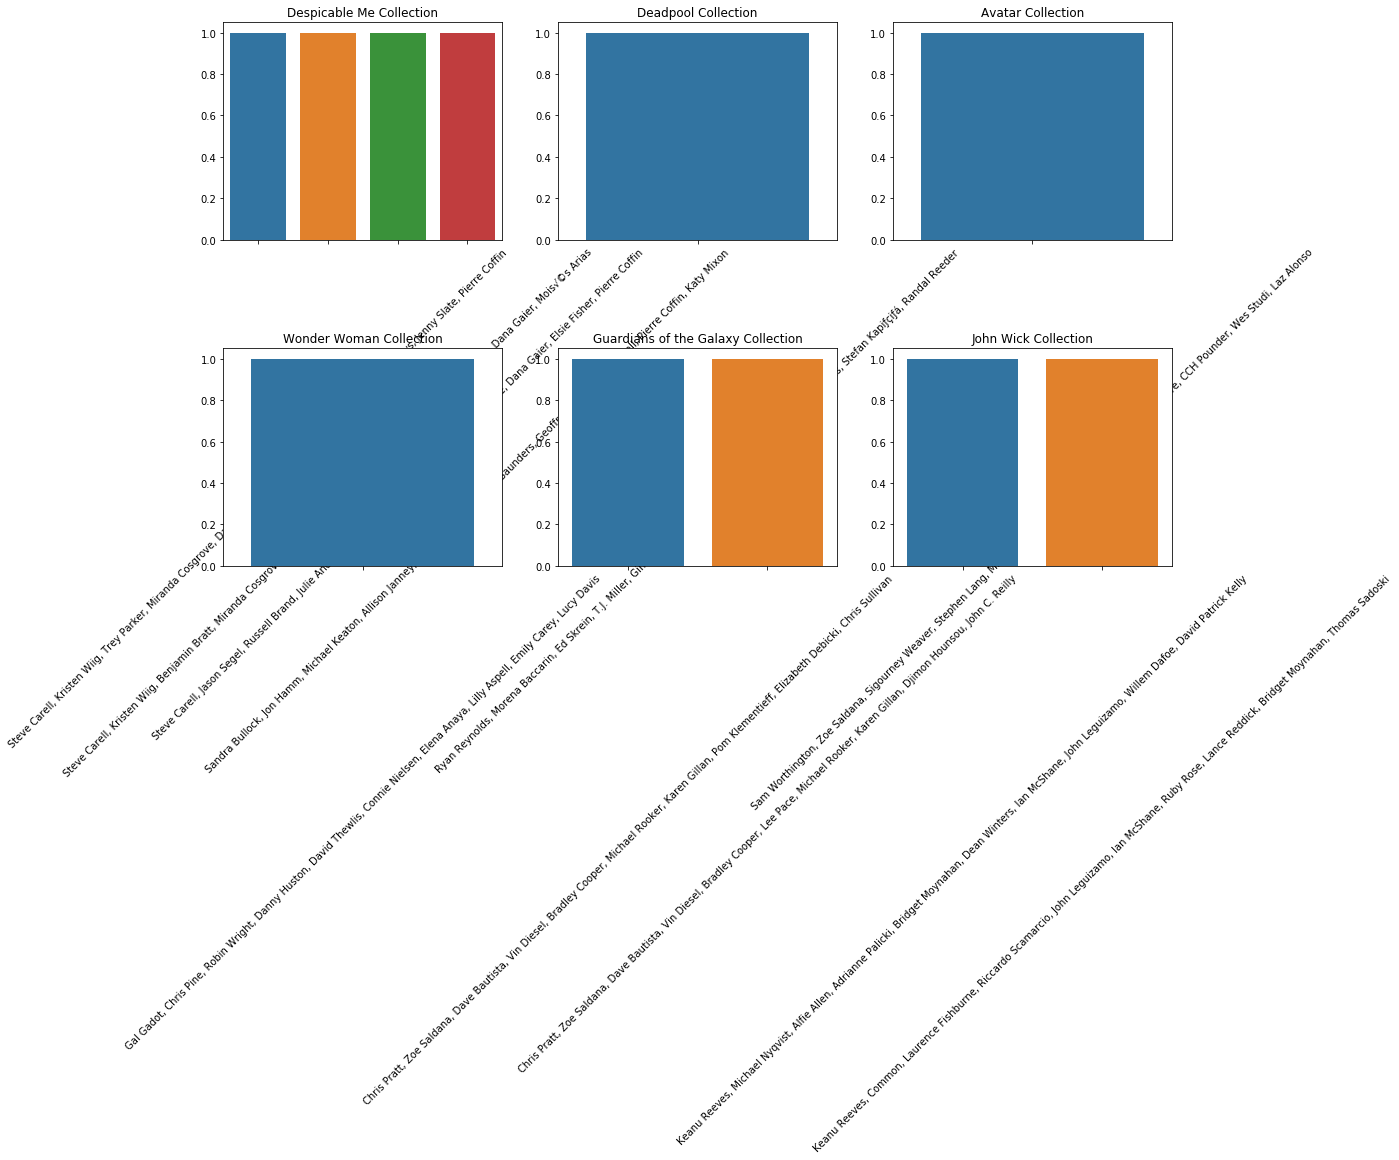

In [588]:
create_graph(dict_pop,df_pop_d)

In [589]:
df_rev_d = pd.DataFrame(columns=['Actor_Name', 'Number_of_appearance', 'Movie_Collection'])
df_rev_d=create_df(dict_rev,df_rev_d)

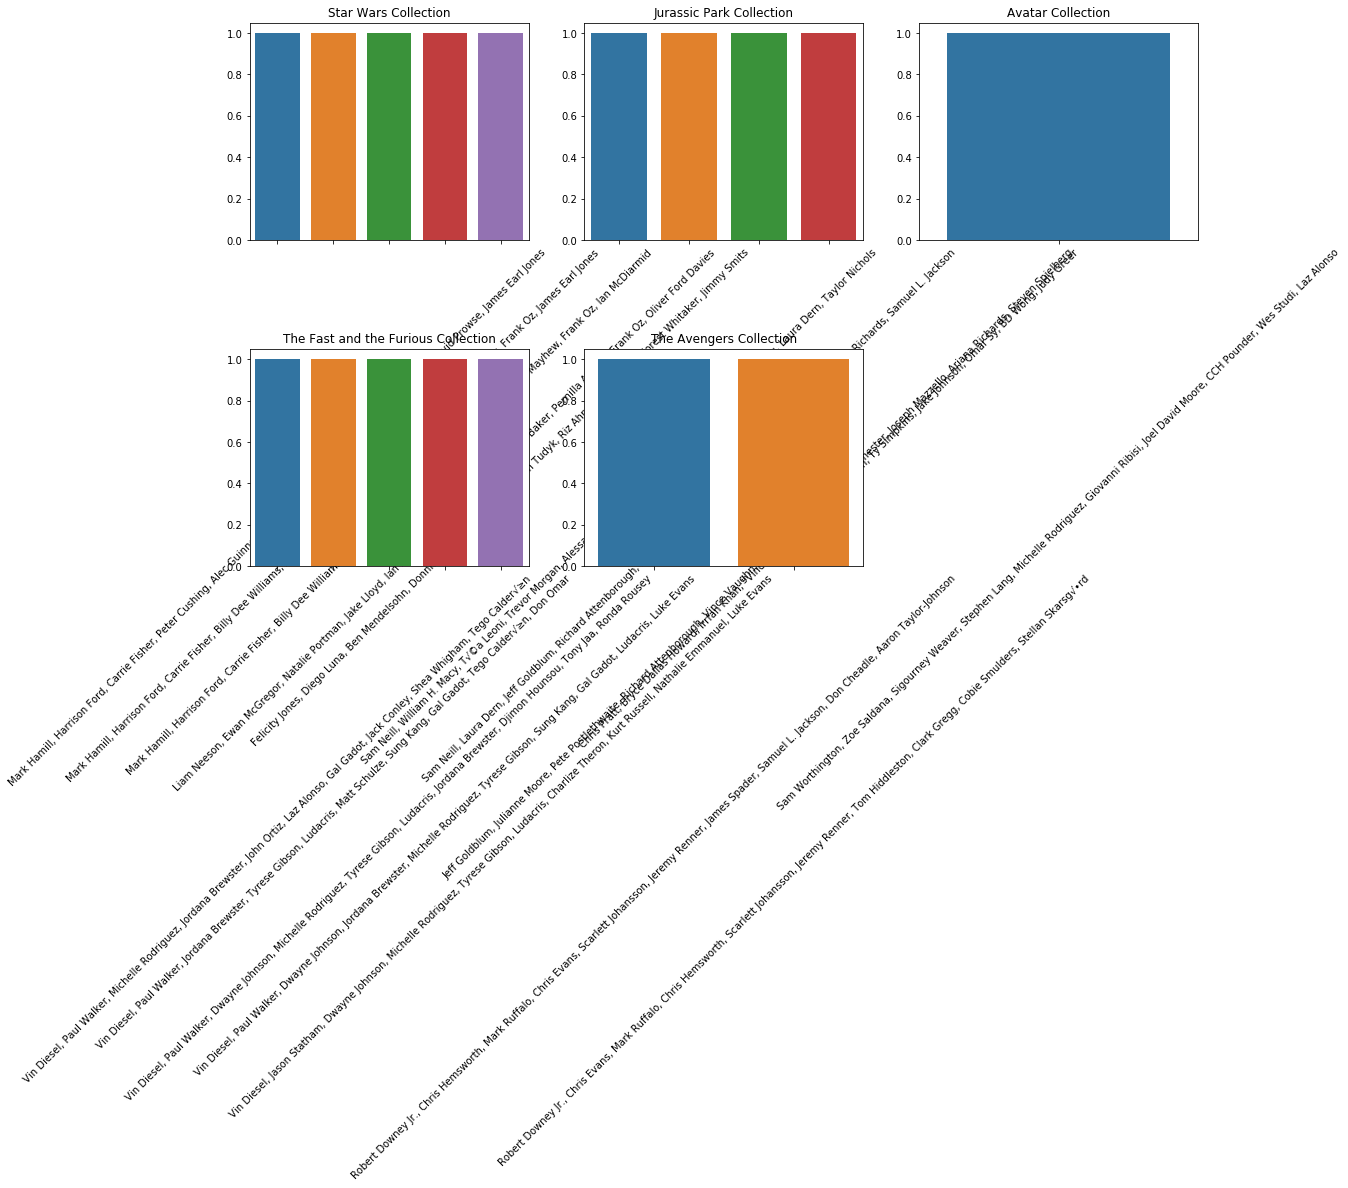

In [590]:
create_graph(dict_rev,df_rev_d)

# Genre

In [566]:
dict_genre={}
for ind in range(df3.shape[0]):
    to_split=str(df3['genres'].iloc[ind]).split(", ")
    for g in to_split:
        dict_l={}
        if g not in dict_genre.keys():
            dict_genre[g]={}
        dict_genre[g][df3['original_title'].iloc[ind]]=[df3['popularity'].iloc[ind],df3['revenue(10*5)'].iloc[ind]]   
#         print("l",dict_l)
#         dict_genre[g]=dict_l
dict_genre

{'Drama': {'Open Water': [10.652818, 546.67954],
  'Bambi': [13.698132, 2674.4715],
  'American Graffiti': [9.188584, 1400.0],
  'Rocky': [14.774066, 1172.35147],
  'The Born Losers': [1.345165, 360.0],
  'My Big Fat Greek Wedding': [6.719949, 3687.44044],
  'Saturday Night Fever': [13.657204, 2371.13184],
  'The Exorcist': [12.137595, 4413.06145],
  'Frankenstein': [8.091603, 120.0],
  'The Godfather': [41.109264, 2450.66411],
  'Psycho': [36.826309, 320.0],
  'The Last Exorcism': [6.39710899999999, 677.3809],
  'Dirty Dancing': [14.044122, 2139.54274],
  'Cat People': [5.110716, 40.0],
  'The Sting': [12.016821, 1596.16327],
  'Rocky II': [11.789813, 2001.8216],
  'The Woman in Black 2: Angel of Death': [6.942139, 265.01323],
  'Magic Mike': [8.732425, 1672.21571],
  'The Last Picture Show': [5.961382, 291.33],
  'The Howling': [6.71551199999999, 179.85893],
  'The Lion King': [21.6057609999999, 7882.41776],
  'Children of the Corn': [11.84696, 140.0],
  'Rocky III': [11.673366, 2700

In [567]:
# print(list(dict_genre.keys())
def genre_order(n): #0 is popularity 1 is revenue
    df_gp=pd.DataFrame(columns=['Genre', 'Movie'])
    for k in dict_genre.keys():
        list_t=sorted(dict_genre[k].items(), key=lambda e: e[1][n],reverse=True)
        list_p=list_t[:5]
        ls=[x[0] for x in list_p]
        df_gp=df_gp.append(pd.Series([k,ls], index=df_gp.columns), ignore_index=True)
    #     print([x[0] for x in list_p])
    #     print(list_p)
    return df_gp

In [568]:
# By popularity
df_p=genre_order(0)
df_p

,Genre,Movie
0,Drama,"[War for the Planet of the Apes, The Dark Knig..."
1,Thriller,"[John Wick, The Hunger Games: Mockingjay - Par..."
2,Animation,"[Minions, Despicable Me 3, Monsters, Inc., Fin..."
3,Family,"[Minions, Fantastic Beasts and Where to Find T..."
4,Horror,"[Alien: Covenant, Psycho, La terza madre, The ..."
5,Adventure,"[Minions, Wonder Woman, Deadpool, Guardians of..."
6,Action,"[Wonder Woman, Deadpool, Guardians of the Gala..."
7,Science Fiction,"[Guardians of the Galaxy Vol. 2, Avatar, The H..."
8,Comedy,"[Minions, Deadpool, Guardians of the Galaxy Vo..."
9,Music,"[Beauty and the Beast, Sister Act, Peter Pan, ..."


In [569]:
#by revenue
df_r=genre_order(1)
df_r

,Genre,Movie
0,Drama,"[The Dark Knight Rises, The Dark Knight, The T..."
1,Thriller,"[Jurassic World, The Fate of the Furious, Skyf..."
2,Animation,"[Frozen, Minions, Toy Story 3, Finding Dory, D..."
3,Family,"[Harry Potter and the Deathly Hallows: Part 2,..."
4,Horror,"[World War Z, Jaws, The Exorcist, Hannibal, Th..."
5,Adventure,"[Avatar, Star Wars: The Force Awakens, The Ave..."
6,Action,"[Avatar, Star Wars: The Force Awakens, The Ave..."
7,Science Fiction,"[Avatar, Star Wars: The Force Awakens, The Ave..."
8,Comedy,"[Minions, Toy Story 3, Finding Dory, Despicabl..."
9,Music,"[Alvin and the Chipmunks: The Squeakquel, Beau..."


In [598]:
# Find actors in the films sorted by revenue and popularity

def print_graph(df_r):
    fig=plt.figure(figsize=(17,10))
    plt.subplots_adjust(hspace=0.5)
    for k in range(5):
        dict_names={}
        ls=df_r['Movie'][k]
        # print(ls)
        for ind in range(df3.shape[0]):
            title=df3['original_title'].iloc[ind]
            if title in ls:
        #         print(title)
                names_list=str(df3['cast'].iloc[ind]).split(", ")
                names_list[0]=names_list[0].replace("[","")
                names_list[-1]=names_list[-1].replace("]","")
        #         print(names_list)
                for name in names_list:
                    if name not in dict_names.keys():
                        dict_names[name]=1
                    else:
                        dict_names[name]+=1
        #                 print(name)
        #                 print(title)
    #     print(dict_names)
        list_t=sorted(dict_names.items(), key = 
                             lambda kv:(kv[1], kv[0]),reverse=True)
        df_n=pd.DataFrame(list_t).head(5)
        df_n.rename(columns={0:'Actor_Name',1:'Number_of_appearance'},inplace=True)

        ax = fig.add_subplot(2, 3, k+1)
        xlist=df_n['Actor_Name'].tolist()
        ylist=df_n['Number_of_appearance'].tolist()
        ax=sns.barplot(x=xlist,y=ylist)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_title(df_r['Genre'][k])

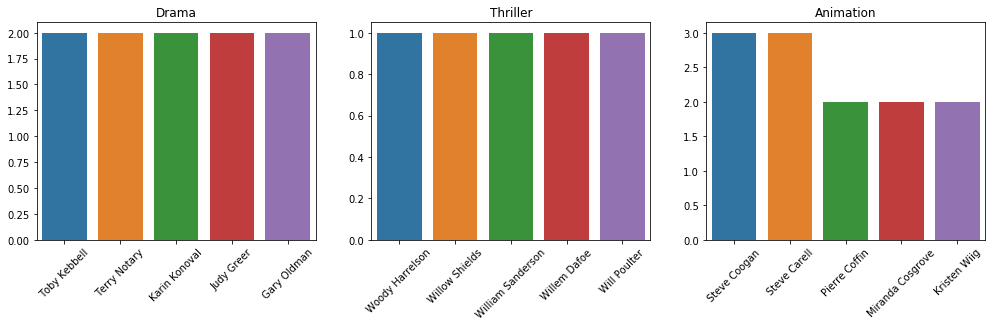

In [599]:
print_graph(df_p)

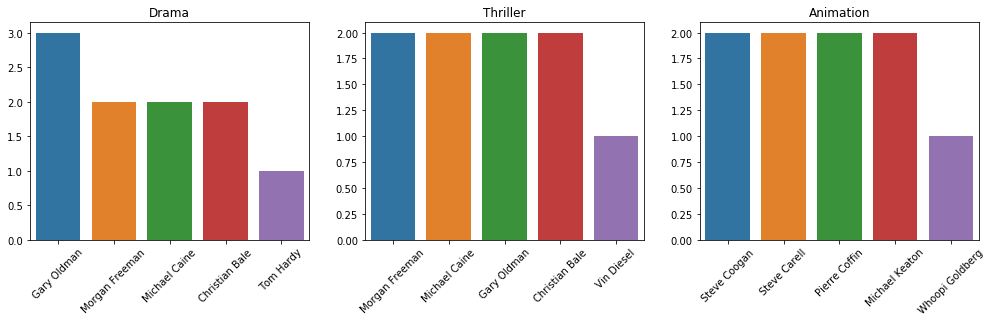

In [600]:
print_graph(df_r)